# ploty와 pandas 함께 사용하기

- cufflinks 라이브러리 사용
- pandas의 Backend 기능 사용

## pandas의 plot() 함수
- pandas 데이터 프레임으로 matplotlib 실행
- wrapper클래스(wrapper 함수) 사용
    - pnadas.DataFrame.plot() -> kind=line -> matplotlib.plot() 수행
    - pnadas.DataFrame.plot() -> kind=bar -> matplotlib.bar() 수행
    - pnadas.DataFrame.plot() -> kind=hist -> matplotlib.hist() 수행

## pandas의 iplot() 함수
- cufflinks 라이브러리 : pandas와 plotly 연결 해주는 역할
- cufflinks 설치, iplot() 함수를 사용하여 plotly 함수 수행
    - pandas.DataFrame.iplot() -> kind=line -> plotly.line()
    - pandas.DataFrame.iplot() -> kind=bar -> plotly.bar()
    - pandas.DataFrame.iplot() -> kind=hist -> plotly.histogram()

## 모던 pandas의 plotting.backend
- pandas의 plot() 함수로 실행되는 시각화 라이브러리를 설정할 수 있게됨
- matplotlib, bokeh, seaborn, plotly 등
- pandas 0.25 버전부터 지원(2019.07.18~)
- pandas의 plot() 함수를 사용하면, plotly.express로 연결되어, 실제 시각화는 plotly.express를 사용하는 것과 같은 효과

## plotly를 pandas에서 손쉽게 사용하기
참고 문서 : https://plotly.com/python/pandas-backend/

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.plotting.backend

'matplotlib'

In [3]:
import plotly.express as px
# 데이터 가져오기

datas =  px.data.gapminder()
datas

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [4]:
# 한국, 미국 데이터만 가져오기
data_korea_usa = datas[datas['country'].isin(['Korea, Rep.', 'United States'])]
data_korea_usa.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
840,"Korea, Rep.",Asia,1952,47.453,20947571,1030.592226,KOR,410
841,"Korea, Rep.",Asia,1957,52.681,22611552,1487.593537,KOR,410
842,"Korea, Rep.",Asia,1962,55.292,26420307,1536.344387,KOR,410
843,"Korea, Rep.",Asia,1967,57.716,30131000,2029.228142,KOR,410
844,"Korea, Rep.",Asia,1972,62.612,33505000,3030.876650,KOR,410


## pandas의 backend를 matplotlib으로 그리기

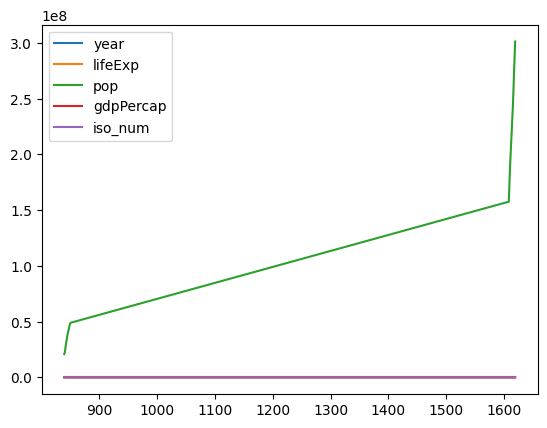

In [8]:
data_korea_usa.plot()
plt.show()

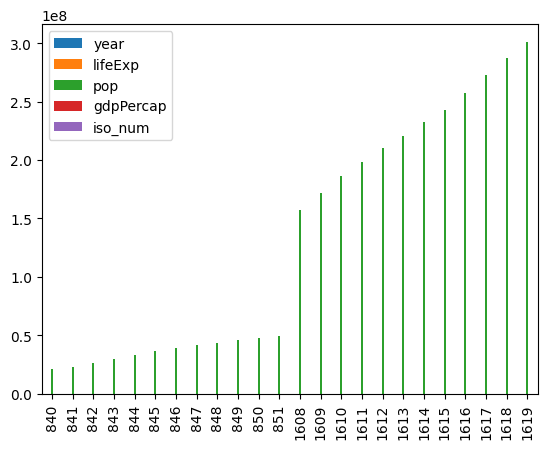

In [10]:
data_korea_usa.plot(kind='bar')
plt.show()

In [16]:
# data_korea_usa.set_index(['year', 'country'])['gdpPercap']
data_korea_usa.set_index(['year', 'country'])['gdpPercap'].unstack()
# unstack() : row index를 column 으로 바꿈

country,"Korea, Rep.",United States
year,,
1952,1030.592226,13990.48208
1957,1487.593537,14847.12712
1962,1536.344387,16173.14586
1967,2029.228142,19530.36557
1972,3030.876650,21806.03594
1977,4657.221020,24072.63213
1982,5622.942464,25009.55914
1987,8533.088805,29884.35041
1992,12104.278720,32003.93224


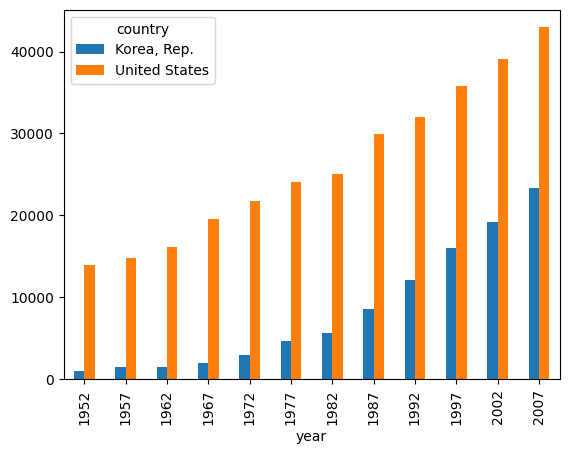

In [20]:
data_korea_usa.set_index(['year', 'country'])['gdpPercap'].unstack().plot(kind='bar')
plt.show()

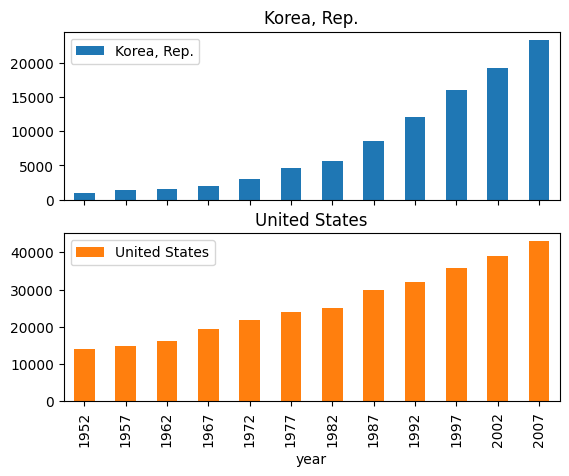

In [25]:
data_korea_usa.set_index(['year', 'country'])['gdpPercap'].unstack().plot(kind='bar', subplots=True)
plt.show()

## pandas의 backend를 plotly로 실행하기

In [26]:
# plotly로 backend 변경
pd.options.plotting.backend = 'plotly'

In [27]:
pd.options.plotting.backend

'plotly'

In [47]:
# bar차트로 그리기
fig = data_korea_usa.plot(kind='bar', x='year', y='gdpPercap', color="country",
             width=800, height=500,
             title = "한국과 미국의 GDP 비교",
             barmode = "group"
            )
fig.show()

In [2]:
data_korea_usa.info()

NameError: name 'data_korea_usa' is not defined

In [46]:
# line 차트로 그리기
fig = data_korea_usa.plot(kind='line', x='year', y='gdpPercap', color="country",
             width=800, height=500,
             title = "한국과 미국의 GDP 비교"
            )
fig.show()